In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time
import nagisa

In [2]:
path_to_eng = "eng_only.txt"#"/content/jpn.txt"
path_to_jpn = "jap_only_space.txt"
path_to_file = "jpn.txt"
f=open(path_to_file,"r", encoding='UTF-8')
eng  = io.open(path_to_eng , encoding='UTF-8').read().strip().split('\n')
jp = io.open(path_to_jpn , encoding='UTF-8').read().strip().split('\n')

print( len(eng) , len(jp) )
for i in range(34650 , 34700):
    print("[ "+eng[i]+" ] ==> [ "+jp[i]+" ] ")
    print(jp[i])

62487 62487
[ I changed my address last month. ] ==> [ 先月引っ越しました。 ] 
先月引っ越しました。
[ I continued to work all morning. ] ==> [ 午前中ずっと、仕事をし続けた。 ] 
午前中ずっと、仕事をし続けた。
[ I could hardly tell who was who. ] ==> [ 誰が誰だかほとんど見分けがつかなかったよ。 ] 
誰が誰だかほとんど見分けがつかなかったよ。
[ I couldn't eat another mouthful. ] ==> [ もう十分いただきました。 ] 
もう十分いただきました。
[ I couldn't find a parking space. ] ==> [ 駐車場が見つからなかったんだ。 ] 
駐車場が見つからなかったんだ。
[ I couldn't find a parking space. ] ==> [ 停めるところが見つからなかったんだよ。 ] 
停めるところが見つからなかったんだよ。
[ I couldn't keep from snickering. ] ==> [ くすくす笑わずにいられなかった。 ] 
くすくす笑わずにいられなかった。
[ I did not understand him at all. ] ==> [ 彼の言ったことの意味が全然分からなかったよ。 ] 
彼の言ったことの意味が全然分からなかったよ。
[ I didn't enjoy the party at all. ] ==> [ そのパーティーはちっとも楽しくなかった。 ] 
そのパーティーはちっとも楽しくなかった。
[ I didn't expect to see Tom here. ] ==> [ まさかここでトムに会うとは思ってなかった。 ] 
まさかここでトムに会うとは思ってなかった。
[ I didn't feel like buying a car. ] ==> [ 車を買う気にはならなかったんだ。 ] 
車を買う気にはならなかったんだ。
[ I didn't go to school yesterday. ] ==> [ きのう私は学校を休んだ。 ] 
きのう私は学校を休んだ。
[ I didn't hav

In [3]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w,language_flag="english"):
  w = unicode_to_ascii(w.lower().strip())
  
  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  if(language_flag=="japanese"):
      w=japTok(w)
  w = re.sub(r"([?.!,¿ーゝゞ、。…‥〽「」『』〝〟〜？！♪？｛｝（）［］])", r" \1 ", w)
  #print(w)
  w = re.sub(r'[" "]+', " ", w)
  #print(w)
  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  #w = re.sub(r"  ", " ", w)
  w = re.sub(r"[^a-zA-Z?？.'！!,\u3000-\u303F\u3040-\u309F\u30A0-\u30FF\uFF00-\uFFEF\u4E00-\u9FAF\u2605-\u2606\u2190-\u2195]+", " ", w)
  #print(w)
  w = w.rstrip().strip()
  #print(w)
  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  #print(w)
  return w

def japTok(text):
    wakati = nagisa.wakati(text)
    sentence = " ".join(wakati)
    return sentence
japTok("「恋人にさよならのキスくらいしないと、キスしてあばよ")

'「 恋人 に さよなら の キス くらい し ない と 、 キス し て あばよ'

In [4]:
en_sentence = u"I will do my best."
jpn_sentence = "頑張ってみる。。"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(jpn_sentence,"japanese"))
print(japTok(jpn_sentence))
print(japTok(en_sentence))

<start> i will do my best . <end>
<start> 頑張っ て みる 。 。 <end>
頑張っ て みる 。 。
I 　 will 　 do 　 my 　 best.


In [5]:
def create_dataset(path, num_examples=0):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')
    #word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]
    input_texts=[]
    target_texts=[]
    word_pair=[]
    if(num_examples==0):
        num_examples = len(lines)
    for line in lines[:min(num_examples,len(lines)-1)]:
        temporary=[]
        target_text, input_text, _ =line.split('\t')
        #temporary.append(preprocess_sentence(input_text))
        temporary.append(preprocess_sentence(target_text,"english"))
        temporary.append(preprocess_sentence(input_text,"japanese"))
        #target_texts.append(preprocess_sentence(japTok(target_text)))
        #input_texts.append(preprocess_sentence(input_text))
        if(temporary!=[]):
            word_pair.append(temporary)
    #return zip(input_texts,target_texts)
    return zip(*word_pair)
create_dataset(path_to_file,15)
print(*zip(create_dataset(path_to_file,15)))

(('<start> go . <end>', '<start> go . <end>', '<start> hi . <end>', '<start> hi . <end>', '<start> hi . <end>', '<start> hi . <end>', '<start> run ! <end>', '<start> run . <end>', '<start> run . <end>', '<start> who ? <end>', '<start> wow ! <end>', '<start> wow ! <end>', '<start> wow ! <end>', '<start> wow ! <end>', '<start> fire ! <end>'),) (('<start> 行け 。 <end>', '<start> 行き なさい 。 <end>', '<start> こんにちは 。 <end>', '<start> もしもし 。 <end>', '<start> やっ ほ ー 。 <end>', '<start> こんにちは ! <end>', '<start> 走れ ! <end>', '<start> 走れ 。 <end>', '<start> 走っ て ! <end>', '<start> 誰 ? <end>', '<start> すこい ! <end>', '<start> ワォ ! <end>', '<start> わぉ ! <end>', '<start> お ー ! <end>', '<start> 火事 た ! <end>'),)


In [6]:
def max_length(tensor):
  return max(len(t) for t in tensor)

def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)
  #print((lang_tokenizer))

  tensor = lang_tokenizer.texts_to_sequences(lang)
  #print(tensor)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                          padding='post')
  #print(tensor)

  return tensor, lang_tokenizer

def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer



In [7]:
# Try experimenting with the size of that dataset
num_examples = 10000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))
print(input_tensor_val[1],target_tensor_val[1])

8000 8000 2000 2000
[   1   13   20  253   64   11 1539   18    9    3    2    0    0    0
    0    0    0    0    0    0] [   1    5   52 1161    8  259    3    2    0]


In [8]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [9]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
14 ----> 彼
4 ----> は
237 ----> 帽子
8 ----> を
640 ----> 上け
6 ----> た
3 ----> 。
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
10 ----> he
2139 ----> tipped
64 ----> his
268 ----> hat
3 ----> .
2 ----> <end>


In [10]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [11]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 20]), TensorShape([64, 9]))

In [12]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [16]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 20, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [17]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [18]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 20, 1)


In [19]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [20]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 2653)


In [21]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [22]:
checkpoint_dir = './training_checkpoints/newmodel/improvised'
checkpoint_prefix = os.path.join(checkpoint_dir, "tmodelckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [23]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 12

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 1 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

In [25]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  1011712   
_________________________________________________________________
gru (GRU)                    multiple                  3938304   
Total params: 4,950,016
Trainable params: 4,950,016
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#encoder.save(filepath="./encoder_model/encode/")
enc_hidden = encoder.initialize_hidden_state()
encoder(enc_hidden).save('./encoder_model/encode/')
#tf.saved_model.save(encoder,'./encoder_model/encode/')

In [26]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence,1)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [27]:
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [28]:
def translate(sentence,translation_flow=0):
  if(translation_flow==0):
      sentence=japTok(sentence)
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [24]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: <start> こんにちは ! <end>
Predicted translation: hello ! <end> 


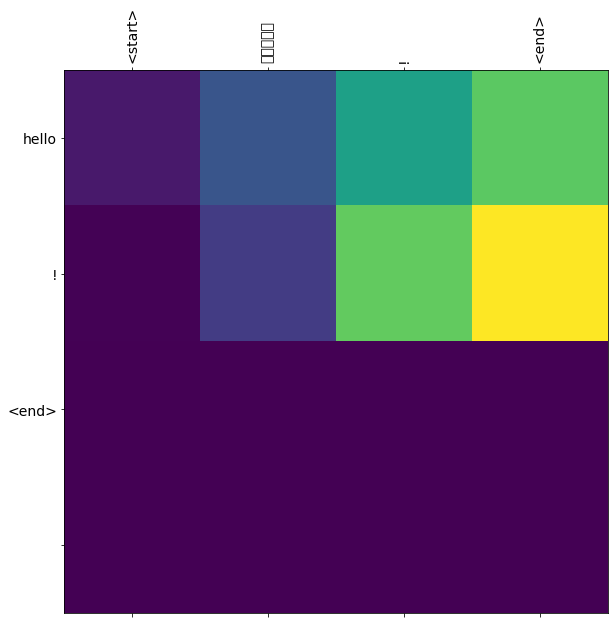

In [30]:
translate(u'こんにちは！')

Input: <start> 行き なさい 。 <end>
Predicted translation: go back . <end> 


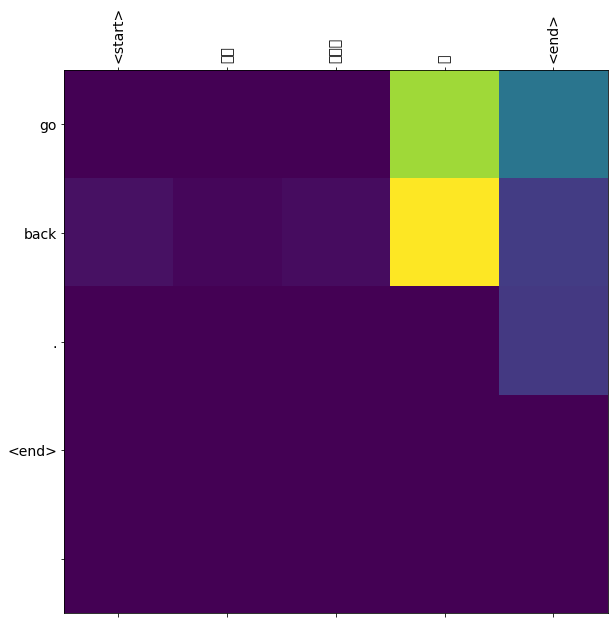

In [31]:
translate(u"行きなさい。")